# Lab01: Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.


### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T \cdot \mathbf{X}\right)^{\dagger} \cdot \mathbf{X}^T \cdot \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T \cdot \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T \cdot \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \cdot \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [57]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [58]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

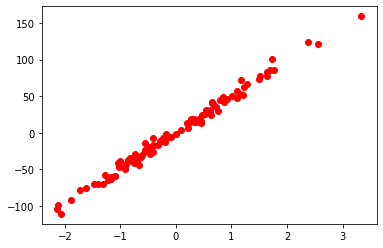

In [59]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()

#### Training function

In [60]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.pinv(A), b)
    
    return w

In [61]:
# Construct one_added_X 
# TODO:
one_added_X = np.ones((X.shape[0], 1))

one_added_X = np.concatenate((one_added_X, X), axis = 1)
# First column of one_added_X is all ones (corresponding to x_0).

print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

[-118.53138483  178.98770697]


(-2.415323866083367, 3.610340234370822)

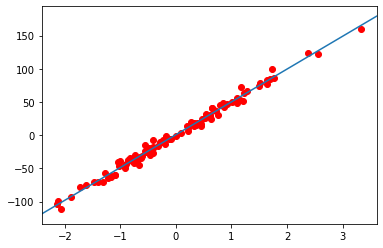

In [85]:
w = train_linear_regression(one_added_X, y)

# Visualize result
#predicted_ys = one_added_X.dot(w)
plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
one_added_xs = np.ones((xs.shape[0], 1))

one_added_xs = np.concatenate((one_added_xs, xs), axis = 1)
# First column of one_added_xs is all ones (corresponding to x_0).

predicted_ys = one_added_xs.dot(w)
print(predicted_ys)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)

- Advantages: Linear Regression is a simple model, the solution for the derivative equation of 0 is also quite simple.
- Disadvantages: 
    - Linear Regression is very sensitive to noise. So before we do it, we need to eliminate the noise (pre-processing).
    - Linear Regression does not represent complex models. 